In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 讀取與顯示數位影像

In [3]:
img_ori=cv2.imread("input\lena.bmp",-1)#讀取影像檔案，第二個參數為影像的讀取方式
cv2.imshow("ex_test",img_ori)#建立視窗
cv2.waitKey(0)#第6行WaitKey等待使用者的鍵盤輸入，單位為毫秒(ms)，例如1,000 代表等待1秒再關閉視窗，0則表示持續等待使用者輸入任意鑑後再關閉視窗。
cv2.destroyAllWindows()#關閉所有視窗

In [4]:
#建資料夾
import os
problems=6
if not os.path.exists("output"):os.mkdir("output")
for i in range(1,problems+1):
    if not os.path.exists("output/"+str(i)):
        os.mkdir("output/"+str(i))


## 1. Histogram Equalization
Histogram is the method to enhance image contrast.
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.

True

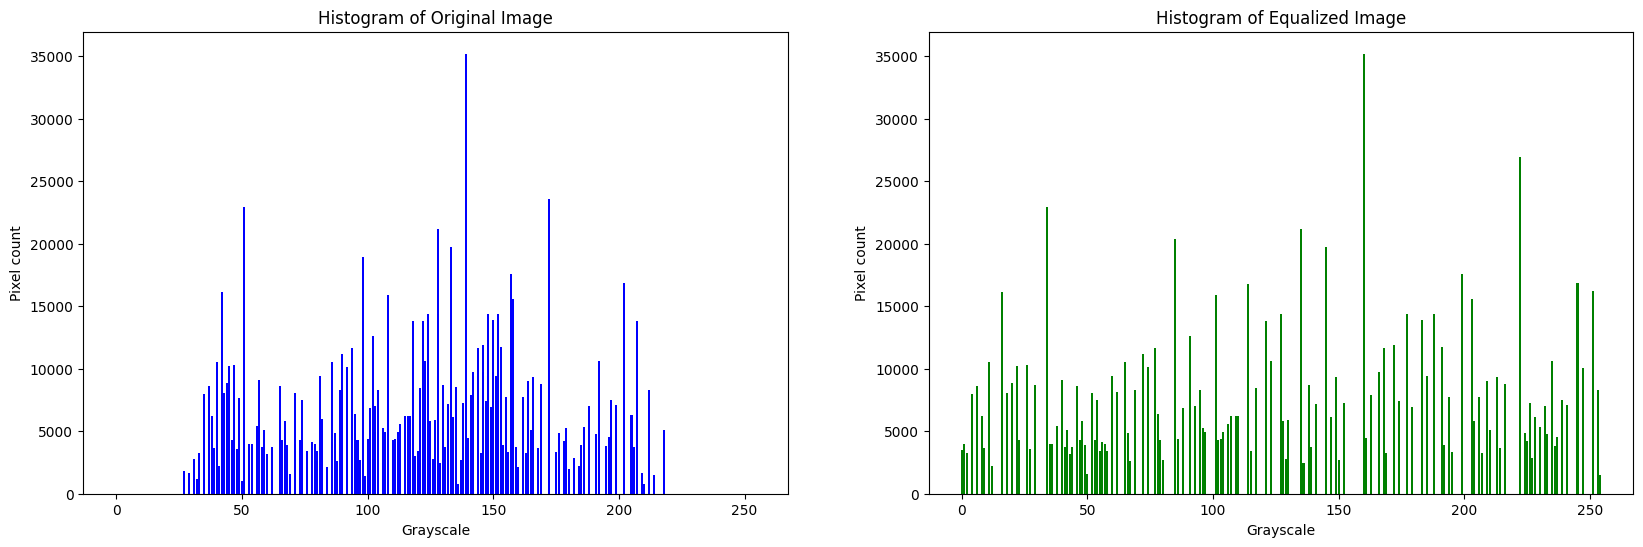

In [5]:
img_ori = cv2.imread("input/lena.bmp", cv2.IMREAD_GRAYSCALE) # Read image as gray.
img_equa=cv2.equalizeHist(img_ori)
img_ori_show=cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB)
img_equa_show=cv2.cvtColor(img_equa,cv2.COLOR_BGR2RGB)

hist_ori=cv2.calcHist([img_ori], [0],None , [255], [0,255])
hist_equa=cv2.calcHist([img_equa], [0],None , [255], [0,255])

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('Histogram of Original Image')
plt.xlabel("Grayscale")
plt.ylabel("Pixel count")
plt.bar(range(0,len(hist_ori)),[x[0] for x in hist_ori],color='blue')

plt.subplot(122)
plt.title('Histogram of Equalized Image')
plt.xlabel("Grayscale")
plt.ylabel("Pixel count")
plt.bar(range(0,len(hist_equa)),[x[0] for x in hist_equa],color='green')

plt.savefig("output/1/hist.png")

# save result
cv2.imwrite("output/1/img_ori.bmp", img_ori_show)
cv2.imwrite('output/1/img_equa.bmp', img_equa_show)

## 2.Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image. Please input the image and use different kernel size to show blur result.

True

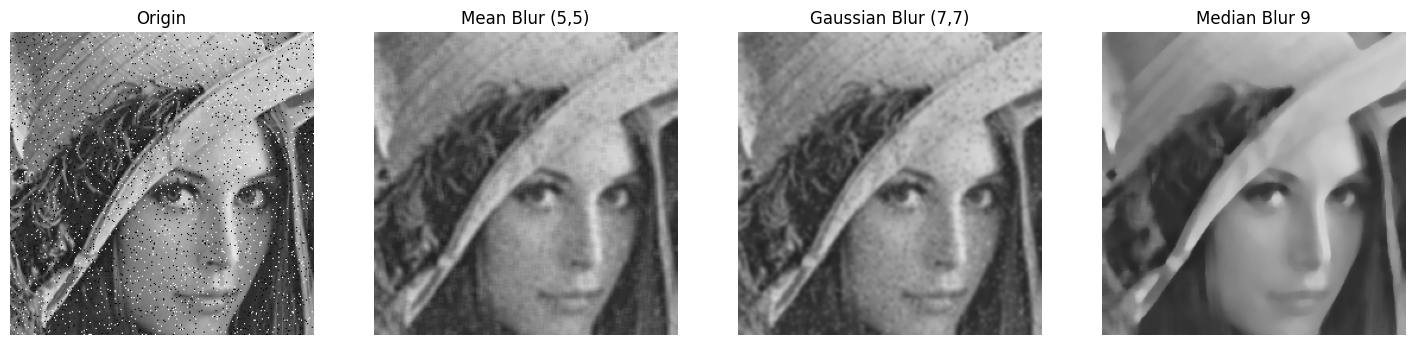

In [6]:
img_noise = cv2.imread("input\lena_noise.png", cv2.IMREAD_GRAYSCALE)

img_mean_blur=cv2.blur(img_noise,(5,5))
img_gaussian_blur=cv2.GaussianBlur(img_noise,(7,7),0)
img_median_blur=cv2.medianBlur(img_noise,9)

plt.figure(figsize=(18,6))
plt.subplot(141)
plt.title('Origin')
plt.axis("off")
img_noise_show=cv2.cvtColor(img_noise,cv2.COLOR_BGR2RGB)
plt.imshow(img_noise_show)

plt.subplot(142)
plt.title('Mean Blur (5,5)')
plt.axis("off")
img_mean_blur_show=cv2.cvtColor(img_mean_blur,cv2.COLOR_BGR2RGB)
plt.imshow(img_mean_blur_show)

plt.subplot(143)
plt.title('Gaussian Blur (7,7)')
plt.axis("off")
img_gaussian_blur_show=cv2.cvtColor(img_gaussian_blur,cv2.COLOR_BGR2RGB)
plt.imshow(img_gaussian_blur_show)

plt.subplot(144)
plt.title('Median Blur 9')
plt.axis("off")
img_median_blur_show=cv2.cvtColor(img_median_blur,cv2.COLOR_BGR2RGB)
plt.imshow(img_median_blur_show)

plt.savefig("output/2/results.png")

#save result

cv2.imwrite('output/2/ori.png', img_noise)
cv2.imwrite('output/2/mean_blur.png', img_mean_blur)
cv2.imwrite('output/2/gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/2/median_blur.png', img_median_blur)


## 3. Binary
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  


True

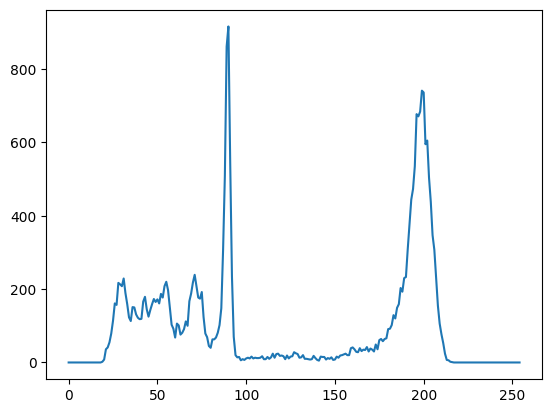

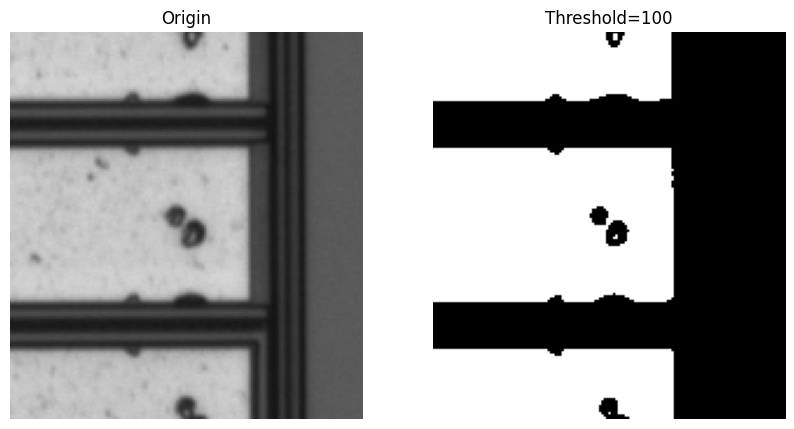

In [7]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

binary1_hist=cv2.calcHist([binary1], [0], None, [255], [0,255])
plt.figure()
plt.plot(binary1_hist)
thres=100
# Do the image binary to seperate pad and background
ret,thres1=cv2.threshold(binary1, thres , 255, cv2.THRESH_BINARY)

img_ori=cv2.cvtColor(binary1,cv2.COLOR_BGR2RGB)
img_thres1=cv2.cvtColor(thres1,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.axis("off")
plt.title("Origin")
plt.imshow(img_ori)
plt.subplot(122)
plt.axis("off")
plt.title("Threshold="+str(thres))
plt.imshow(img_thres1)

plt.savefig("output/3/result1.png")
# save result
cv2.imwrite('output/3/binary_task1.bmp', thres1)

True

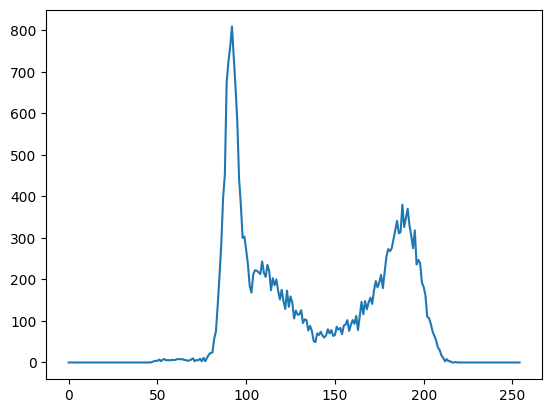

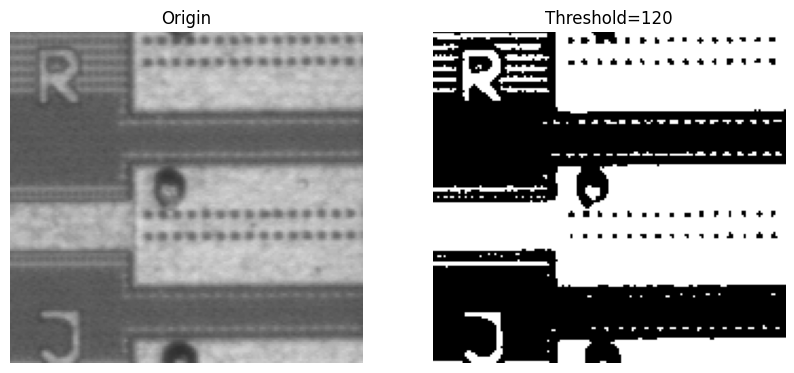

In [8]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

binary2_hist=cv2.calcHist([binary2], [0], None, [255], [0,255])
plt.figure()
plt.plot(binary2_hist)
thres=120
# Do the image binary to seperate pad and background

ret,thres2=cv2.threshold(binary2, thres , 255, cv2.THRESH_BINARY)

img_ori=cv2.cvtColor(binary2,cv2.COLOR_BGR2RGB)
img_thres2=cv2.cvtColor(thres2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.axis("off")
plt.title("Origin")
plt.imshow(img_ori)
plt.subplot(122)
plt.axis("off")
plt.title("Threshold="+str(thres))
plt.imshow(img_thres2)

plt.savefig("output/3/result2.png")

# save result
cv2.imwrite('output/3/binary_task2.bmp', thres2)


True

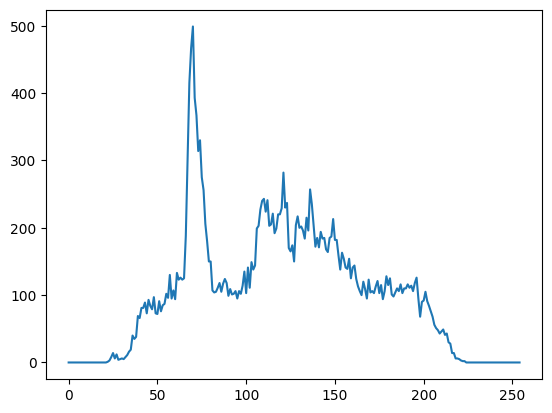

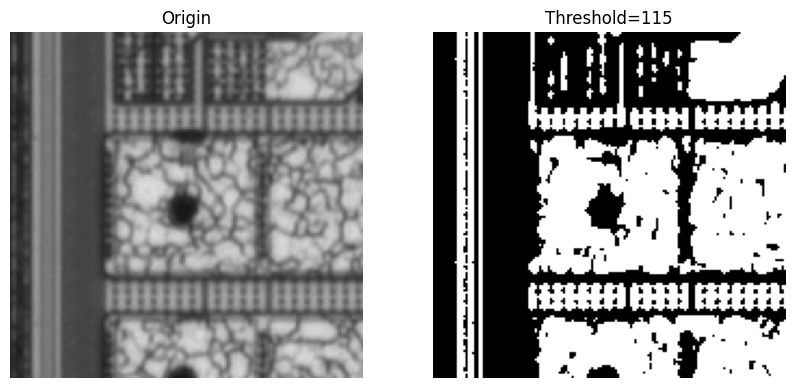

In [9]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

binary3_hist=cv2.calcHist([binary3], [0], None, [255], [0,255])
plt.figure()
plt.plot(binary3_hist)
thres=115
# Do the image binary to seperate pad and background

ret,thres3=cv2.threshold(binary3, thres , 255, cv2.THRESH_BINARY)

img_ori=cv2.cvtColor(binary3,cv2.COLOR_BGR2RGB)
img_thres3=cv2.cvtColor(thres3,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.axis("off")
plt.title("Origin")
plt.imshow(img_ori)
plt.subplot(122)
plt.axis("off")
plt.title("Threshold="+str(thres))
plt.imshow(img_thres3)

plt.savefig("output/3/result3.png")
# save result
cv2.imwrite('output/3/binary_task3.bmp', thres3)

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

True

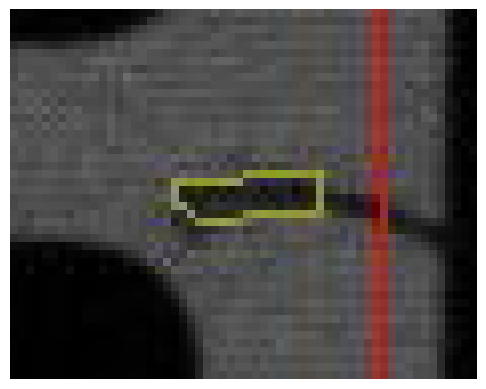

In [10]:
# Yellow box.
yellow = cv2.imread('input/yellow.jpg')

# Step 1. Transfer color to HSV
yellow_hsv=cv2.cvtColor(yellow,cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
upper=np.array([34, 255, 255])
lower=np.array([30, 100, 100])
yellow_mask = cv2.inRange(yellow_hsv,lower ,upper )

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
w=len(yellow[0]) #-
h=len(yellow)  # |

x1,y1,x2,y2=w,h,0,0

for i in range(h):
    for j in range(w):
        if yellow_mask[i][j]!=0:
        #    print(i,j,yellow_mask[i][j])
           if i<y1: y1=i
           if i>y2: y2=i
           if j<x1: x1=j
           if j>x2: x2=j
           
# Step 4. Crop the image by the coordinate.
crop_edge = 20
cropHSV_yellow = yellow[y1-crop_edge: y2+crop_edge, x1-crop_edge: x2+crop_edge]

# save result
plt.figure()
plt.axis("off")
yellow_show=cv2.cvtColor(cropHSV_yellow,cv2.COLOR_BGR2RGB)
plt.imshow(yellow_show)


cv2.imwrite('output/4/cropHSV_yellow.jpg', cropHSV_yellow)

True

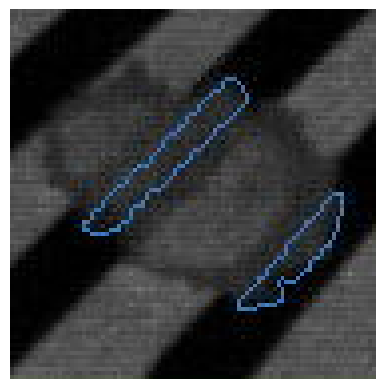

In [11]:
# Blue box.
blue = cv2.imread('input/blue.jpg')

# Step 1. Transfer color to HSV
blue_hsv=cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
upper=np.array([125, 255, 255])
lower=np.array([110, 100, 100])
blue_mask = cv2.inRange(blue_hsv,lower ,upper)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
w=len(blue[0]) #-
h=len(blue)  # |

x1,y1,x2,y2=w,h,0,0

for i in range(h):
    for j in range(w):
        if blue_mask[i][j]!=0:
        #    print(i,j,blue_mask[i][j])
           if i<y1: y1=i
           if i>y2: y2=i
           if j<x1: x1=j
           if j>x2: x2=j
           
# Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropHSV_blue = blue[y1-crop_edge: y2+crop_edge, x1-crop_edge: x2+crop_edge]   # take (x, y, w, h) as example.
crop_edge = 20
plt.figure()
plt.axis("off")
blue_show=cv2.cvtColor(cropHSV_blue,cv2.COLOR_BGR2RGB)
plt.imshow(blue_show)

# save result
cv2.imwrite('output/4/cropHSV_blue.jpg', cropHSV_blue)

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

True

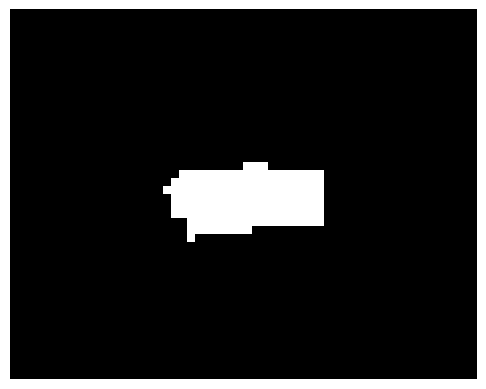

In [12]:
hsv_yellow = cv2.imread('output/4/cropHSV_yellow.jpg')
yellow_hsv=cv2.cvtColor(hsv_yellow,cv2.COLOR_BGR2HSV)

upper=np.array([33, 200, 200])
lower=np.array([30, 43, 46])
yellow_mask = cv2.inRange(yellow_hsv,lower ,upper )

# Try to use erosion, dilation, open, close to fill up the lines.
kernel = np.ones((5, 5), np.uint8)
dilated_img = cv2.dilate(yellow_mask, kernel, iterations=1)
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)

# save result
plt.figure()
plt.axis("off")
result=cv2.cvtColor(eroded_img,cv2.COLOR_BGR2RGB)
plt.imshow(result)
cv2.imwrite('output/5/morpho_yellow.jpg', result)

True

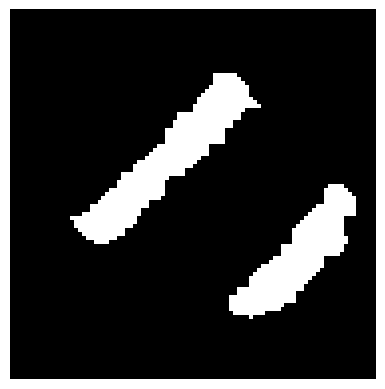

In [13]:
hsv_blue = cv2.imread('output/4/cropHSV_blue.jpg')

blue_hsv=cv2.cvtColor(hsv_blue,cv2.COLOR_BGR2HSV)

upper=np.array([125, 255, 255])
lower=np.array([100, 100, 15])
blue_mask = cv2.inRange(blue_hsv,lower ,upper)

# Try to use erosion, dilation, open, close to fill up the lines.
kernel = np.ones((5, 5), np.uint8)
dilated_img = cv2.dilate(blue_mask, kernel, iterations=1)
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)

# save result
plt.figure()
plt.axis("off")
result=cv2.cvtColor(eroded_img,cv2.COLOR_BGR2RGB)
plt.imshow(result)
cv2.imwrite('output/5/morpho_blue.jpg', result)

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

The pad area is  6787.5
The probe mark area is  64.0
The probe mark area is  28.0


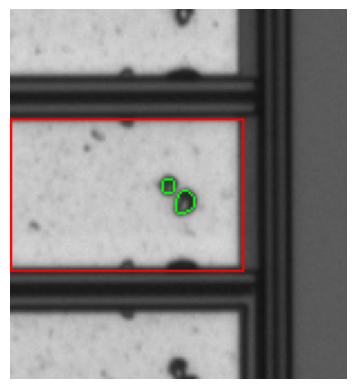

In [14]:
pad_task = cv2.imread('input/binary_task1.bmp')
pad_task1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.
thres=110
ret,thres_task=cv2.threshold(pad_task1, thres , 255, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(thres_task, kernel, iterations=2)
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)
contours, _ = cv2.findContours(eroded_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area=0
max_contour=None
for contour in contours:
    pad_area = cv2.contourArea(contour)
    if pad_area>max_area:
        max_area=pad_area
        max_contour=contour
    # # 繪製矩形框
x, y, w, h = cv2.boundingRect(max_contour)
cv2.rectangle(pad_task, (x, y), (x+w, y+h), (0, 0, 255), 1)
print('The pad area is ', max_area)

contour_s=[]
for contour in contours:
    if x<contour[0][0][0]<x+w and y<contour[0][0][1]<y+h:
         contour_s.append(contour)
contours_to_plot= -1 #畫全部
plotting_color= (0,255,0)#畫綠色框
thickness= 1
#開始畫contours
with_contours = cv2.drawContours(pad_task,contour_s, contours_to_plot, plotting_color,thickness)
        
plt.figure()
plt.axis("off")
result=cv2.cvtColor(with_contours,cv2.COLOR_BGR2RGB)
plt.imshow(result)
# save and print result

cv2.imwrite('output/6/pad_task1_cont.bmp', with_contours)
for i in contour_s:
    probemark_area=cv2.contourArea(i)
    print('The probe mark area is ', probemark_area)
